<a href="https://colab.research.google.com/github/AndreyKowal/Deep-Learning/blob/simple-solutions/Cifar100_Baseline(60_)_ResNet50_TL_FT(44_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Необходимо создать, обучить нейронную сеть с точностью не менее 50% и упаковать её в архив для загрузки на демо-панель:
* создать нейронную сеть для распознавания классов в cifar100
* сохраните веса
* подготовить запуск модели "из коробки"
* подготовить архив с готовой нейронной сетью для загрузки в демо-панель


In [ ]:
from tensorflow.keras.datasets import cifar100 #Загружаем базу cifar100

# Сеть прямого распространения
from tensorflow.keras.models import Sequential 

# Базовые слои для свёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# Работа с изображениями
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

# Оптимизаторы
from tensorflow.keras.optimizers import Adam     

# Используем для to_categoricall
from tensorflow.keras import utils               

# Для отрисовки изображений
from tensorflow.keras.preprocessing import image 

# импорт tensorflow
import tensorflow as tf

# Библиотека работы с массивами
import numpy as np

# Для отрисовки графиков
import matplotlib.pyplot as plt                  

# Для отрисовки изображений
from PIL import Image                            

# Для генерации случайных чисел 
import random                                    

# Для округления
import math                                      

# Для работы с файлами 
import os                                        

# модуль для отсчета времени
import time 

# Чистка ОЗУ
import gc

# Рисование графиков в ячейках Colab
%matplotlib inline

Названия классов cifar100:

In [ ]:
# определяем названия классов по порядку, установленному в описании набора данных
classes = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver',
           'bed', 'bee', 'beetle', 'bicycle', 'bottle',
           'bowl', 'boy', 'bridge', 'bus', 'butterfly',
           'camel', 'can', 'castle', 'caterpillar', 'cattle',
           'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach',
           'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
           'dolphin', 'elephant', 'flatfish', 'forest', 'fox',
           'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard',
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard',
           'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
           'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
           'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
           'plain', 'plate', 'poppy', 'porcupine', 'possum',
           'rabbit', 'raccoon', 'ray', 'road', 'rocket',
           'rose', 'sea', 'seal', 'shark', 'shrew',
           'skunk', 'skyscraper', 'snail', 'snake', 'spider',
           'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
           'tank', 'telephone', 'television', 'tiger', 'tractor',
           'train', 'trout', 'tulip', 'turtle', 'wardrobe',
           'whale', 'willow_tree', 'wolf', 'tawomannk', 'worm']

In [ ]:
# Функция для вывода графиков 
def show_graph(history):
  plt.figure(figsize=(10,8))

  plt.subplot(2, 1, 1)
  plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
  plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.legend()

  plt.grid(which='major', color='black', alpha=0.3)
  plt.minorticks_on()
  plt.grid(which='minor', color='gray', linestyle='--', alpha=0.3)

  plt.subplot(2, 1, 2)
  plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
  plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Ошибка')
  plt.legend()

  plt.grid(which='major', color='black', alpha=0.3)
  plt.minorticks_on()
  plt.grid(which='minor', color='gray', linestyle='--', alpha=0.3)

  plt.show()

# Загрузка данных

In [ ]:
#Загружаем cifar100
(x_train100, y_train100), (x_test100, y_test100) = cifar100.load_data()

169001437/169001437 [==============================] - 6s 0us/step


In [ ]:
x_train100.shape, y_train100.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
x_data = np.concatenate([x_train100, x_test100])
y_data = np.concatenate([y_train100, y_test100])

In [ ]:
x_data.shape, y_data.shape

((60000, 32, 32, 3), (60000, 1))

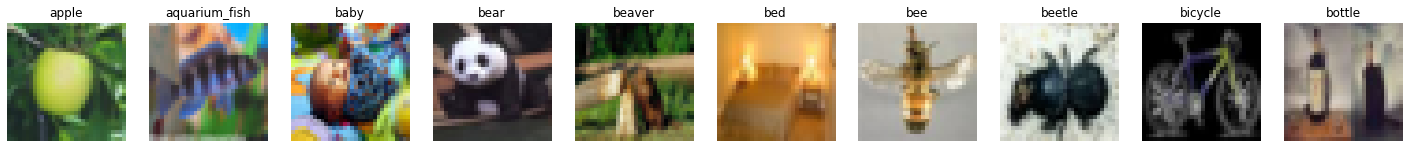

In [ ]:
#Выводим для примера картинки по первым 10 классам

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) #Создаем полотно из 10 графиков
for i in range(10): #Проходим по классам от 0 до 9
  label_indexes = np.where(y_data==i)[0] #Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) #Случайным образом выбираем из списка индекс
  img = x_data[index] #Выбираем из x_train нужное изображение
  axs[i].set_title(classes[i])
  axs[i].imshow(Image.fromarray(img)) #Отображаем изображение i-ым графиков
  axs[i].axis('off')

plt.show() #Показываем изображения

# Подготовка данных

In [ ]:
#Превращаем y_train и y_test сетей в формат one hot encoding
y_data = utils.to_categorical(y_data, 100)
# y_test100 = utils.to_categorical(y_test100, 100)

# Нормализация
# x_train100 = x_train100 / 255.
# x_test100 = x_test100 / 255.

In [ ]:
# Посмотрим размеры выборок перед обучением
print(x_data.shape)
# print(x_test100.shape)
print(y_data.shape)
# print(y_test100.shape)

(60000, 32, 32, 3)
(60000, 100)


In [ ]:
datagen = ImageDataGenerator(
    # featurewise_center=True,
    # featurewise_std_normalization=True,
    rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

# datagen.fit(x_data)

# Создаем и обучаем модель baseline

In [ ]:
def create_compile_model(input=(32, 32, 3), output=100):

  model = Sequential()
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=input))
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))

  model.add(BatchNormalization())
  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5)) # 0.5

  model.add(BatchNormalization())
  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5)) # 0.5

  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.5)) # 0.5
  model.add(Dense(output, activation='softmax'))

  model.compile(loss="categorical_crossentropy",
                optimizer=Adam(learning_rate= 0.0001),
                metrics=["accuracy"])
  
  return model

Epoch 1/40
391/391 [==============================] - 35s 81ms/step - loss: 4.4098 - accuracy: 0.0356 - val_loss: 5.4289 - val_accuracy: 0.0166
Epoch 2/40
391/391 [==============================] - 31s 78ms/step - loss: 3.9584 - accuracy: 0.0918 - val_loss: 4.0485 - val_accuracy: 0.0866
Epoch 3/40
391/391 [==============================] - 32s 81ms/step - loss: 3.6422 - accuracy: 0.1431 - val_loss: 3.7032 - val_accuracy: 0.1435
Epoch 4/40
391/391 [==============================] - 31s 78ms/step - loss: 3.3839 - accuracy: 0.1868 - val_loss: 3.2520 - val_accuracy: 0.2185
Epoch 5/40
391/391 [==============================] - 32s 81ms/step - loss: 3.1528 - accuracy: 0.2304 - val_loss: 3.0498 - val_accuracy: 0.2620
Epoch 6/40
391/391 [==============================] - 31s 78ms/step - loss: 2.9560 - accuracy: 0.2670 - val_loss: 2.8329 - val_accuracy: 0.3030
Epoch 7/40
391/391 [==============================] - 32s 81ms/step - loss: 2.7860 - accuracy: 0.3028 - val_loss: 2.6770 - val_accuracy:

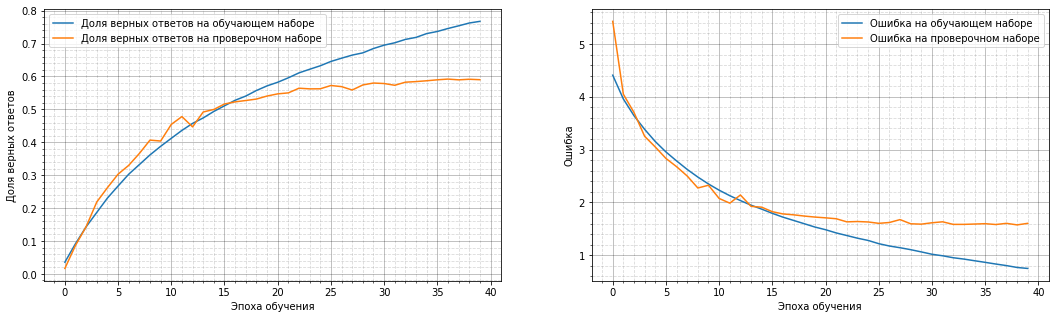

In [ ]:
bs = 128

model = create_compile_model()
#Обучение модели без аугментации
history = model.fit(x_train100, 
                    y_train100, 
                    batch_size=bs, 
                    epochs=40,  # 30
                    validation_data=(x_test100, y_test100),
                    verbose=1)


show_graph(history)

Epoch 1/12
391/391 [==============================] - 34s 80ms/step - loss: 0.6586 - accuracy: 0.7933 - val_loss: 1.5559 - val_accuracy: 0.6013
Epoch 2/12
391/391 [==============================] - 31s 79ms/step - loss: 0.6351 - accuracy: 0.7993 - val_loss: 1.5523 - val_accuracy: 0.6051
Epoch 3/12
391/391 [==============================] - 30s 78ms/step - loss: 0.6178 - accuracy: 0.8070 - val_loss: 1.5523 - val_accuracy: 0.6043
Epoch 4/12
391/391 [==============================] - 32s 82ms/step - loss: 0.6104 - accuracy: 0.8090 - val_loss: 1.5660 - val_accuracy: 0.6045
Epoch 5/12
391/391 [==============================] - 32s 82ms/step - loss: 0.5996 - accuracy: 0.8103 - val_loss: 1.5613 - val_accuracy: 0.6055
Epoch 6/12
391/391 [==============================] - 32s 81ms/step - loss: 0.5917 - accuracy: 0.8127 - val_loss: 1.5583 - val_accuracy: 0.6067
Epoch 7/12
391/391 [==============================] - 32s 81ms/step - loss: 0.5914 - accuracy: 0.8134 - val_loss: 1.5562 - val_accuracy:

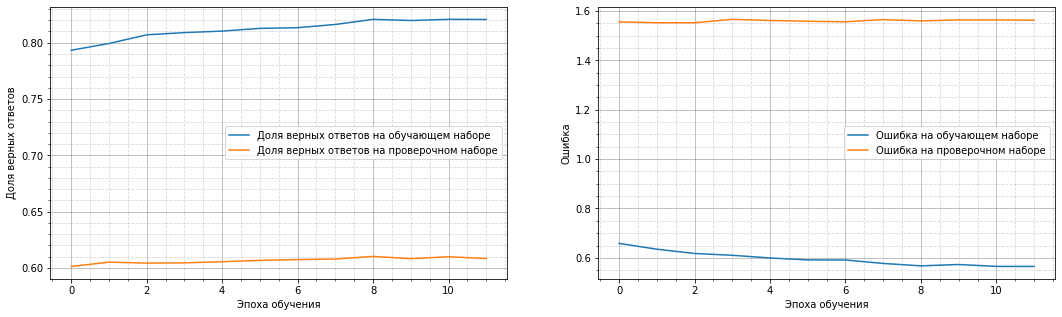

In [ ]:
# компилируем
model.compile(optimizer=Adam(learning_rate= 0.00001),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

hist = model.fit(x_train100, 
                    y_train100, 
                    batch_size=bs, 
                    epochs=12,
                    validation_data=(x_test100, y_test100),
                    verbose=1)

show_graph(hist)

# Transfer Learning

In [ ]:
# Слой подготовки данных (у каждой модели свой)
preprocess_input = tf.keras.applications.resnet50.preprocess_input
gc.collect()

# Создание модели
image_shape = (224, 224, 3)
base_model = tf.keras.applications.resnet50.ResNet50(input_shape=image_shape,
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False
base_model.summary()

global_average_layer = tf.keras.layers.GlobalAveragePooling2D() # Глобал пулинг
prediction_layer = tf.keras.layers.Dense(len(classes), activation='softmax') # По количеству классов

# собираем полную модель 
inputs = tf.keras.Input(shape=(image_shape))
# x = data_augmentation(inputs)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

94765736/94765736 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [ ]:
# компилируем
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0     

In [ ]:
initial_epochs = 50

CurrentTime = time.time() # Засекаем время для измерения времени обучения нейронной сети

# обучаем
history = model.fit(datagen.flow(x_data, y_data, batch_size=160, subset='training'),
         validation_data=datagen.flow(x_data, y_data, batch_size=40, subset='validation'),
         steps_per_epoch=len(x_data) / 200,
         epochs=initial_epochs)

print('Время обучения: {:.0f} секунд ({:.2f} минут)'.format(time.time() - CurrentTime, (time.time() - CurrentTime)/60))

Epoch 1/50
300/300 [==============================] - 54s 140ms/step - loss: 7.0911 - accuracy: 0.0671 - val_loss: 4.4693 - val_accuracy: 0.1636
Epoch 2/50
300/300 [==============================] - 39s 131ms/step - loss: 4.9137 - accuracy: 0.1672 - val_loss: 3.7332 - val_accuracy: 0.2422
Epoch 3/50
300/300 [==============================] - 38s 126ms/step - loss: 4.2607 - accuracy: 0.2153 - val_loss: 3.3938 - val_accuracy: 0.2786
Epoch 4/50
300/300 [==============================] - 38s 127ms/step - loss: 3.8804 - accuracy: 0.2498 - val_loss: 3.1870 - val_accuracy: 0.3030
Epoch 5/50
300/300 [==============================] - 39s 129ms/step - loss: 3.6177 - accuracy: 0.2743 - val_loss: 3.0811 - val_accuracy: 0.3195
Epoch 6/50
300/300 [==============================] - 38s 128ms/step - loss: 3.4307 - accuracy: 0.2919 - val_loss: 2.9498 - val_accuracy: 0.3334
Epoch 7/50
300/300 [==============================] - 38s 127ms/step - loss: 3.2643 - accuracy: 0.3030 - val_loss: 2.8752 - val_ac

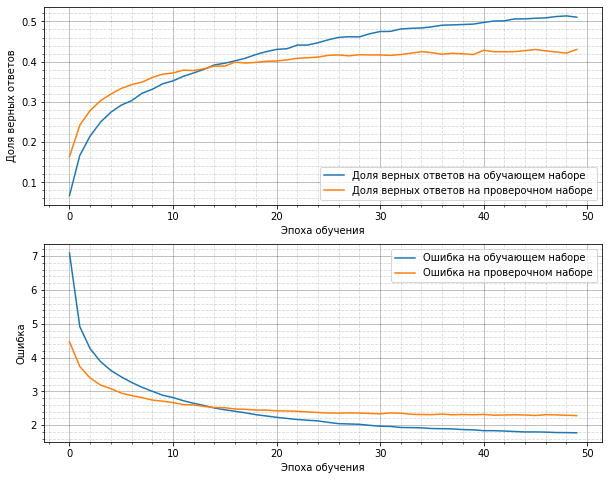

In [ ]:
show_graph(history)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Fine-Tuning

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  175


In [ ]:
# Fine-tune from this layer onwards
fine_tune_at = 165

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
# компилируем
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.00001),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.__operators__.getitem (S  (None, 224, 224, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0     

In [ ]:
len(model.trainable_variables)

14

In [ ]:
fine_tune_epochs = 20
total_epochs =  initial_epochs + fine_tune_epochs

CurrentTime = time.time()                    # Засекаем время для измерения времени обучения нейронной сети

# обучаем
history_ft = model.fit(datagen.flow(x_data, y_data, batch_size=160, subset='training'),
         validation_data=datagen.flow(x_data, y_data, batch_size=40, subset='validation'),
         steps_per_epoch=len(x_data) / 200,
         initial_epoch=history.epoch[-1],
         epochs=total_epochs)

print('Время обучения: {:.0f} секунд ({:.2f} минут)'.format(time.time() - CurrentTime, (time.time() - CurrentTime)/60))

Epoch 50/70
300/300 [==============================] - 39s 128ms/step - loss: 1.6759 - accuracy: 0.5370 - val_loss: 2.2334 - val_accuracy: 0.4392
Epoch 51/70
300/300 [==============================] - 37s 125ms/step - loss: 1.6609 - accuracy: 0.5402 - val_loss: 2.2438 - val_accuracy: 0.4355
Epoch 52/70
300/300 [==============================] - 37s 125ms/step - loss: 1.6473 - accuracy: 0.5433 - val_loss: 2.2495 - val_accuracy: 0.4321
Epoch 53/70
300/300 [==============================] - 37s 124ms/step - loss: 1.6412 - accuracy: 0.5452 - val_loss: 2.2432 - val_accuracy: 0.4342
Epoch 54/70
300/300 [==============================] - 37s 124ms/step - loss: 1.6323 - accuracy: 0.5474 - val_loss: 2.2582 - val_accuracy: 0.4292
Epoch 55/70
300/300 [==============================] - 38s 126ms/step - loss: 1.6186 - accuracy: 0.5489 - val_loss: 2.2406 - val_accuracy: 0.4411
Epoch 56/70
300/300 [==============================] - 38s 126ms/step - loss: 1.6170 - accuracy: 0.5523 - val_loss: 2.2515 -

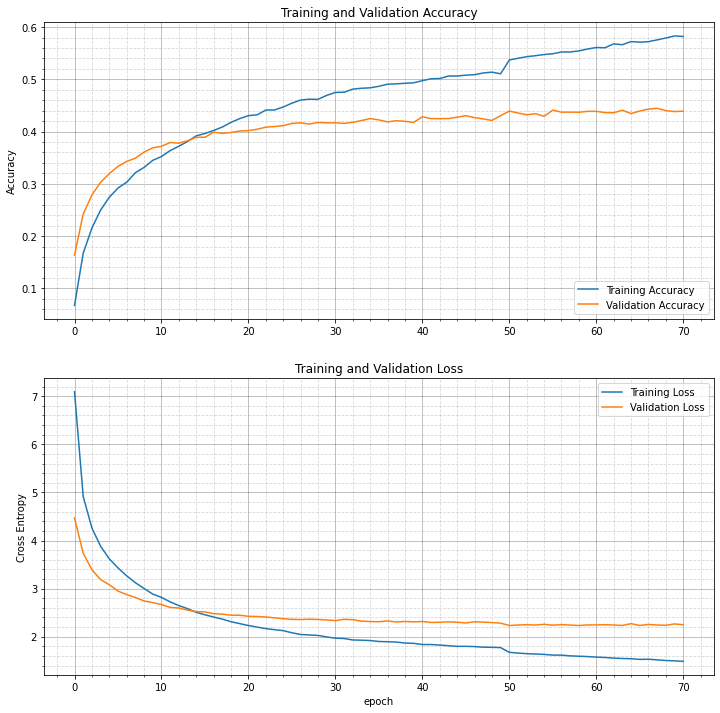

In [ ]:
# Вывод графиков 
acc += history_ft.history['accuracy']
val_acc += history_ft.history['val_accuracy']

loss += history_ft.history['loss']
val_loss += history_ft.history['val_loss']

plt.figure(figsize=(12, 12))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
# plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.grid(which='major', color='black', alpha=0.3)
plt.minorticks_on()
plt.grid(which='minor', color='gray', linestyle='--', alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

plt.grid(which='major', color='black', alpha=0.3)
plt.minorticks_on()
plt.grid(which='minor', color='gray', linestyle='--', alpha=0.3)

plt.show()

# Сохраняем и загружаем веса

In [ ]:
# Имя и желаемый путь к будущему файлу
# path_weight = 'weights_cifar100_2.h5' 
path_model = 'model_all.h5'

# сохранение весов модели
# model.save_weights(path_weight) 

# Сохранение обученной модели полностью (веса и архитектура)
model.save(path_model)

In [ ]:
from google.colab import files               # Функция для скачивания данных на локальный компьютер

# files.download(filename=path_weight)       # Скачивание готового архива
files.download(filename=path_model)

print('Веса загружены на компьтер')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Веса загружены на компьтер


In [ ]:
from tf.keras.models import load_model

model = load_model('model_all.h5')
print('Модель загружена!')

# path_weight = 'weights_cifar100_2.h5'
# model.load_weights(path_weight)  # загрузка весов
# print('Веса загружены!')

Веса загружены!


# Проверим точность предсказания

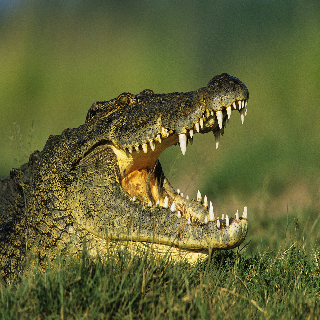

In [ ]:
# Просмотр тестового изображения                                

# Путь к файлу изображения
test_path = '/content/Crocodil.jpg' 
img = image.load_img(test_path, target_size=(320, 320))
# Вывод изображения на экран 
display(img)

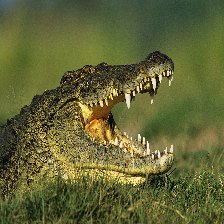

1/1 [==============================] - 0s 63ms/step
Результат распознавания:
apple          0.02%
aquarium_fish  0.23%
baby           0.08%
bear           5.84%
beaver         2.26%
bed            0.01%
bee            2.19%
beetle         0.80%
bicycle        1.45%
bottle         0.24%
bowl           0.02%
boy            1.24%
bridge         0.70%
bus            0.03%
butterfly      0.46%
camel          2.86%
can            0.33%
castle         0.23%
caterpillar    2.81%
cattle         3.34%
chair          0.03%
chimpanzee     0.70%
clock          0.46%
cloud          0.07%
cockroach      0.07%
couch          1.24%
crab           0.63%
crocodile      3.17%
cup            0.03%
dinosaur       0.30%
dolphin        0.02%
elephant       0.28%
flatfish       0.23%
forest         2.22%
fox            1.70%
girl           0.04%
hamster        0.16%
house          1.88%
kangaroo       0.29%
computer_keyboard 0.06%
lamp           0.01%
lawn_mower     0.07%
leopard       12.56%
lion           1.

In [ ]:
size = (224, 224)
class_names = classes

img = image.load_img(test_path, target_size=size)
display(img)

img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)

pred = model.predict(img)
print('Результат распознавания:')

for i, cl in enumerate(class_names):    
    # Вывод предсказания сети для каждого класса
    print('{:<14s}{:6.2%}'.format(cl, pred[0, i]))
print()

cls_image = np.argmax(pred)
print('Изображен(а): ', class_names[cls_image])

In [ ]:
def predict(img_path='./1.jpg', weights_path='./weights.h5'):
  
  image_shape = 32, 32, 3
  classes = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver',
           'bed', 'bee', 'beetle', 'bicycle', 'bottle',
           'bowl', 'boy', 'bridge', 'bus', 'butterfly',
           'camel', 'can', 'castle', 'caterpillar', 'cattle',
           'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach',
           'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
           'dolphin', 'elephant', 'flatfish', 'forest', 'fox',
           'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard',
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard',
           'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
           'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
           'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
           'plain', 'plate', 'poppy', 'porcupine', 'possum',
           'rabbit', 'raccoon', 'ray', 'road', 'rocket',
           'rose', 'sea', 'seal', 'shark', 'shrew',
           'skunk', 'skyscraper', 'snail', 'snake', 'spider',
           'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
           'tank', 'telephone', 'television', 'tiger', 'tractor',
           'train', 'trout', 'tulip', 'turtle', 'wardrobe',
           'whale', 'willow_tree', 'wolf', 'tawomannk', 'worm']

  # Создание модели
  model = Sequential()
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))

  model.add(BatchNormalization())
  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5)) # 0.5

  model.add(BatchNormalization())
  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5)) # 0.5

  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.5)) # 0.5
  model.add(Dense(100, activation='softmax'))

  model.compile(loss="categorical_crossentropy",
                optimizer=Adam(learning_rate= 0.0001),
                metrics=["accuracy"])
  
  # загрузка весов
  model.load_weights(weights_path)  

  img = image.load_img(img_path, target_size=size)
  img = image.img_to_array(img)
  img = np.array(img, dtype='float64') / 255.
  img = np.expand_dims(img, axis=0)

  cls_image = np.argmax(model.predict(img))
  print('Изображен(а): ', classes[cls_image])

In [ ]:
predict(img_path=test_path, weights_path=path_weight)

1/1 [==============================] - 0s 135ms/step
Изображен(а):  crab


# Архивация модели

In [ ]:
text_code = '''

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam 

def predict(img_path='./1.jpg', weights_path='./weights.h5'):
  
  image_shape = 32, 32, 3
  classes = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver',
           'bed', 'bee', 'beetle', 'bicycle', 'bottle',
           'bowl', 'boy', 'bridge', 'bus', 'butterfly',
           'camel', 'can', 'castle', 'caterpillar', 'cattle',
           'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach',
           'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
           'dolphin', 'elephant', 'flatfish', 'forest', 'fox',
           'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard',
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard',
           'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
           'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid',
           'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
           'plain', 'plate', 'poppy', 'porcupine', 'possum',
           'rabbit', 'raccoon', 'ray', 'road', 'rocket',
           'rose', 'sea', 'seal', 'shark', 'shrew',
           'skunk', 'skyscraper', 'snail', 'snake', 'spider',
           'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
           'tank', 'telephone', 'television', 'tiger', 'tractor',
           'train', 'trout', 'tulip', 'turtle', 'wardrobe',
           'whale', 'willow_tree', 'wolf', 'tawomannk', 'worm']

  # Создание модели
  model = Sequential()
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=image_shape))
  model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))

  model.add(BatchNormalization())
  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5)) # 0.5

  model.add(BatchNormalization())
  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5)) # 0.5

  model.add(Flatten())
  model.add(Dense(1024, activation='relu'))
  model.add(Dropout(0.5)) # 0.5
  model.add(Dense(100, activation='softmax'))

  model.compile(loss="categorical_crossentropy",
                optimizer=Adam(learning_rate= 0.0001),
                metrics=["accuracy"])
  
  # загрузка весов
  model.load_weights(weights_path)  

  img = image.load_img(img_path, target_size=size)
  img = image.img_to_array(img)
  img = np.array(img, dtype='float64') / 255.
  img = np.expand_dims(img, axis=0)

  cls_image = np.argmax(model.predict(img))
  print('Изображен(а): ', classes[cls_image])

'''

# Запись содержимого переменной в файл скрипта

with open('script.py', 'w') as f:  # Создание / открытие файла 
    f.write(text_code)             # Запись в файл значения переменной text_code

In [ ]:
label_txt = '''

bus
crab
snake

'''

with open('label.txt', 'w') as f:  # Создание / открытие файла 
    f.write(label_txt.strip())     # Запись в файл значения переменной

In [ ]:
import os
from zipfile import ZipFile as Zip             # Модуль для работы с zip-архивами

# Список всех файлов
integrate_files = ['weights_cifar100_2.h5', 'script.py', 'label.txt', 'bus.jpg', 'crab.jpg', 'snake.jpg']

zipArchive = Zip('/content/archive.zip', 'w')  # Открытие файла, если такого не существует - будет создан новый

for file in integrate_files:                   # Для всех всем нужных файлов:
    if os.path.exists(file):                   # Если файл существует,
        zipArchive.write(file)                 # то добавление его в архив
    else:
        print(f'Файл {file} отсутствует!')     # иначе вывод на экран названия отсутствующего файла

zipArchive.close()                             # В финале архив следует закрыть, как и обычный файл